In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("HepatitisCdata.csv")

# Display dataset structure
print("Dataset Shape:", df.shape)
print("First 5 rows:")
print(df.head())


Dataset Shape: (615, 14)
First 5 rows:
   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  


In [2]:
# Drop the unnecessary column if it exists
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Check column names to confirm removal
print("Columns after removal:", df.columns)


Columns after removal: Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


In [3]:
# Encode 'Sex' column
df['Sex'] = df['Sex'].map({'m': 0, 'f': 1})

# Encode 'Category' column
category_mapping = {
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 1,
    '1=Hepatitis': 2,
    '2=Fibrosis': 3,
    '3=Cirrhosis': 4
}
df['Category'] = df['Category'].map(category_mapping)

# Verify encoding
print("Unique values in 'Sex':", df['Sex'].unique())
print("Unique values in 'Category':", df['Category'].unique())


Unique values in 'Sex': [0 1]
Unique values in 'Category': [0 1 2 3 4]


In [4]:
# Check for missing values
print("Missing values before handling:\n", df.isnull().sum())

# Fill missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Confirm missing values are handled
print("Missing values after handling:\n", df.isnull().sum())


Missing values before handling:
 Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64
Missing values after handling:
 Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [5]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Confirm dataset size after removing duplicates
print("Dataset shape after duplicate removal:", df.shape)


Dataset shape after duplicate removal: (615, 13)


In [6]:
# Convert categorical columns to integers
df['Sex'] = df['Sex'].astype(int)
df['Category'] = df['Category'].astype(int)

# Verify data types
print(df.dtypes)


Category      int32
Age           int64
Sex           int32
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object


In [7]:
# Check basic statistics
print("Dataset Description:\n", df.describe())

# Check class distribution in the target variable
print("Category Distribution:\n", df['Category'].value_counts())

Dataset Description:
          Category         Age         Sex         ALB         ALP         ALT  \
count  615.000000  615.000000  615.000000  615.000000  615.000000  615.000000   
mean     0.386992   47.408130    0.386992   41.620732   68.222927   28.441951   
std      1.052294   10.055105    0.487458    5.775935   25.646364   25.449889   
min      0.000000   19.000000    0.000000   14.900000   11.300000    0.900000   
25%      0.000000   39.000000    0.000000   38.800000   52.950000   16.400000   
50%      0.000000   47.000000    0.000000   41.950000   66.200000   23.000000   
75%      0.000000   54.000000    1.000000   45.200000   79.300000   33.050000   
max      4.000000   77.000000    1.000000   82.200000  416.600000  325.300000   

              AST         BIL         CHE        CHOL         CREA  \
count  615.000000  615.000000  615.000000  615.000000   615.000000   
mean    34.786341   11.396748    8.196634    5.366992    81.287805   
std     33.090690   19.673150    2.205

In [8]:
# Check basic statistics
print("Dataset Description:\n", df.describe())

# Check class distribution in the target variable
print("Category Distribution:\n", df['Category'].value_counts())


Dataset Description:
          Category         Age         Sex         ALB         ALP         ALT  \
count  615.000000  615.000000  615.000000  615.000000  615.000000  615.000000   
mean     0.386992   47.408130    0.386992   41.620732   68.222927   28.441951   
std      1.052294   10.055105    0.487458    5.775935   25.646364   25.449889   
min      0.000000   19.000000    0.000000   14.900000   11.300000    0.900000   
25%      0.000000   39.000000    0.000000   38.800000   52.950000   16.400000   
50%      0.000000   47.000000    0.000000   41.950000   66.200000   23.000000   
75%      0.000000   54.000000    1.000000   45.200000   79.300000   33.050000   
max      4.000000   77.000000    1.000000   82.200000  416.600000  325.300000   

              AST         BIL         CHE        CHOL         CREA  \
count  615.000000  615.000000  615.000000  615.000000   615.000000   
mean    34.786341   11.396748    8.196634    5.366992    81.287805   
std     33.090690   19.673150    2.205

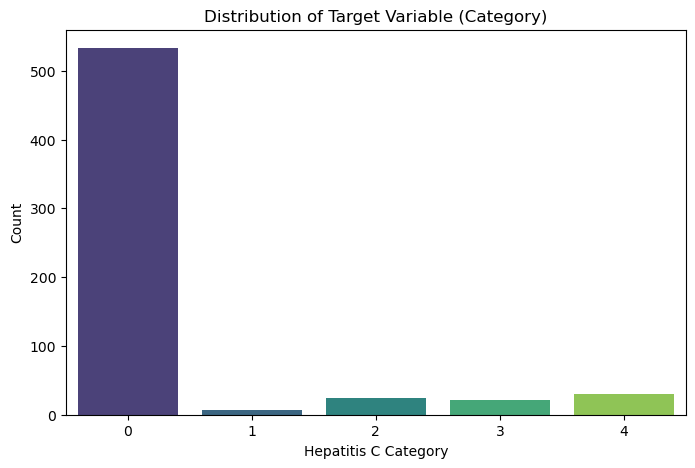

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x=df['Category'], palette="viridis")
plt.xlabel("Hepatitis C Category")
plt.ylabel("Count")
plt.title("Distribution of Target Variable (Category)")
plt.show()


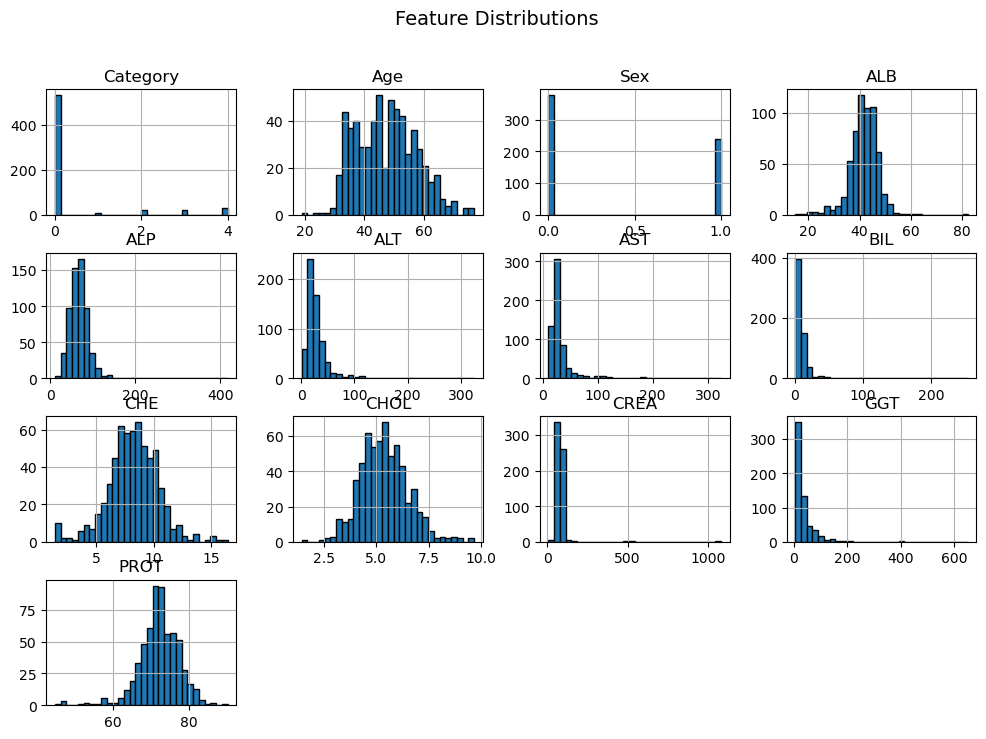

In [10]:
# Plot histograms for numerical features
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


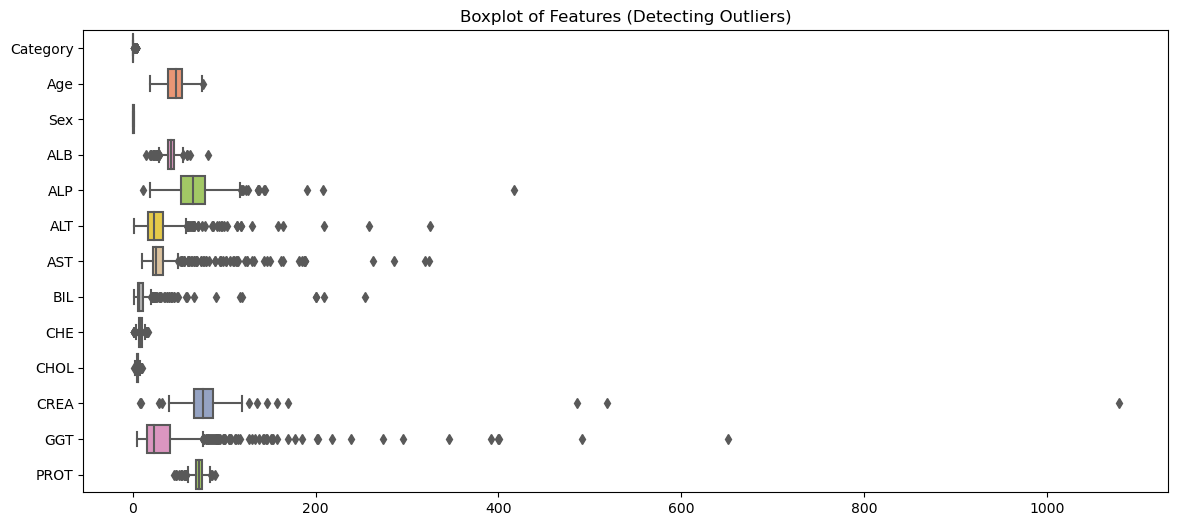

In [11]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplot of Features (Detecting Outliers)")
plt.show()


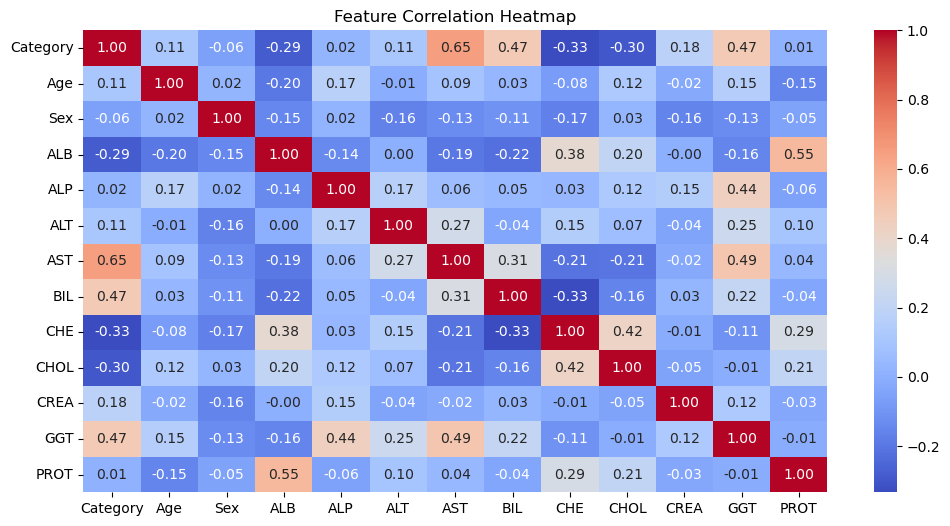

In [12]:
import numpy as np

plt.figure(figsize=(12, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
